### **Trabajo en grupo: Primera entrega** <br>
**Grupo:** 1 <br>
<hr>

### Requerimientos del sistema

* Versión de Python: 3.11.4 o superior
* Versión del módulo Pandas: 2.0.1 o superior
* Versión del módulo Plotnine: _________ o superior

# **Consumo de drogas: Atributos de la personalidad relacionados** 




### **1. Comprender el problema  y establecer objetivos** 

### **2. Set de datos objetivo**

El dataset utilizado fue obtenido de la siguiente dirección: https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified

#### 2.1 Data card: (hacer tabla con HTML o pegar imagen)

#### 2.2 Importación de librerías

In [1]:
import pandas as pd
import plotnine as p9
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import utilities.dictionary as dicts

#### 2.3 Importación de los datos

In [2]:
df = pd.read_csv('../data/drug_consumption.data', header = None)
df.head(5)                 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


El set de datos no dispone de encabezado, se procede a renombrar cada una de las columnas de acuerdo con la información proporcionada en la documentación de la fuente: UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified)

In [3]:
df.columns = ['ID','Age (Real)','Gender (Real)','Education (Real)','Country (Real)',
              'Ethnicity (Real)','Nscore (Real)','Escore (Real)','Oscore (Real)','Ascore (Real)',
              'Cscore (Real)','Impulsive (Real)','SS (Real)','Alcohol','Amphet','Amyl','Benzos',
              'Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD',
              'Meth','Mushrooms','Nicotine','Semer','VSA']
df.head(10)

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real),Escore (Real),Oscore (Real),Ascore (Real),...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


### **3. Estadísticas descriptivas preliminares**

In [4]:
df.shape

(1885, 32)

In [5]:
df.dtypes

ID                    int64
Age (Real)          float64
Gender (Real)       float64
Education (Real)    float64
Country (Real)      float64
Ethnicity (Real)    float64
Nscore (Real)       float64
Escore (Real)       float64
Oscore (Real)       float64
Ascore (Real)       float64
Cscore (Real)       float64
Impulsive (Real)    float64
SS (Real)           float64
Alcohol              object
Amphet               object
Amyl                 object
Benzos               object
Caff                 object
Cannabis             object
Choc                 object
Coke                 object
Crack                object
Ecstasy              object
Heroin               object
Ketamine             object
Legalh               object
LSD                  object
Meth                 object
Mushrooms            object
Nicotine             object
Semer                object
VSA                  object
dtype: object

In [6]:
df.describe()

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real),Escore (Real),Oscore (Real),Ascore (Real),Cscore (Real),Impulsive (Real),SS (Real)
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [7]:
# El dataset tiene muchas variables y no es posible visualizar de forma cómoda la data. 
# Se opta por visualizar el DataFrame transpuesto para 5 observaciones al azar

df.sample(5).T

,419,19,1804,219,729
ID,422,20,1808,220,732
Age (Real),-0.95197,0.49788,0.49788,0.49788,-0.95197
Gender (Real),-0.48246,-0.48246,-0.48246,0.48246,-0.48246
Education (Real),-1.22751,-0.05921,0.45468,-0.61113,-0.61113
Country (Real),0.96082,0.96082,-0.57009,0.96082,0.96082
Ethnicity (Real),-0.31685,-0.31685,0.1144,-0.31685,-0.31685
Nscore (Real),0.31287,-0.34799,-0.14882,-0.34799,-0.79151
Escore (Real),0.80523,-1.7625,-0.94779,-0.57545,1.2861
Oscore (Real),-0.01928,-2.39883,1.24033,0.14143,-0.31776
Ascore (Real),-0.91699,-1.92595,-0.60633,1.11406,-0.15487


Se constata que el dataset dispone de 1885 observaciones, es decir, 1885 encuentados de acuerdo con el datacard de la fuente. <br>
Cada observación dispone de 32 atributos, de las cuales 19 de tipo object y el resto son de tipo float64 e int64. <br>
Acorde con la información de la fuente y lo hallado en esta etapa preliminar, ninguna de las variables son númericas. Todas las variables son categóricas y 12 de ellas han sido cuantificadas (aquellas de tipo float64).  


### **4. Preprocesamiento y limpieza de los datos**

El preprocesamiento y limpieza tiene como objetivo mejorar la calidad de los datos y los resultados de la minería. Esta sección incluye: <br>
* Eliminación de ruido y datos aislados o outliers.
* Eliminar inconsistencias y duplicados.
* Imputar información faltante.
 

#### 4.1 Preprocesamiento de datos
* Incompletos: atributos que carecen de valores, atributos sin interés (missing values).
* Ruidosos: contienen errores o “outliers”
* Inconsistentes: discrepancias en códigos o nombres.
* Tamaño excesivo: filas y/o columnas.

In [8]:
# Existencia de valores null 
df.isnull().values.any()

False

In [9]:
# Reducción tamaño del dataframe: Número de columnas
'''
La variable "ID" no ofrece información valiosa para el análisis planteado en el objetivo del proyecto, debido a que es el número
de registro en la base de datos original (a la cual no tenemos acceso). Además, acorde con la fuente, este ID no puede estar relacionado 
con el participante. 

Por lo anterior, se opta por eliminarla. 

'''
df = df.drop(labels=['ID'], axis=1) 

In [10]:
# Verificación de inconsistencias: Discrepacias en los datos respecto a los códigos o nombres definidos por la fuente (data card).

def crear_diccionarios_valores_unicos(data):
  """
  Crea un diccionario por cada columna del conjunto de datos, compuesto por sus valores únicos

  Args:
    data: El conjunto de datos

  Returns:
    Un diccionario de diccionarios, donde la clave es el nombre del atributo y el valor es un conjunto con los valores únicos
  """

  diccionarios = {}
  for atributo in data.columns:
    valores_unicos = set(data[atributo].unique())
    diccionarios[atributo] = valores_unicos
  return diccionarios

In [11]:
diccionarios = crear_diccionarios_valores_unicos(df)
diccionarios

{'Age (Real)': {-0.95197, -0.07854, 0.49788, 1.09449, 1.82213, 2.59171},
 'Gender (Real)': {-0.48246, 0.48246},
 'Education (Real)': {-2.43591,
  -1.7379,
  -1.43719,
  -1.22751,
  -0.61113,
  -0.05921,
  0.45468,
  1.16365,
  1.98437},
 'Country (Real)': {-0.57009,
  -0.46841,
  -0.28519,
  -0.09765,
  0.21128,
  0.24923,
  0.96082},
 'Ethnicity (Real)': {-1.10702,
  -0.50212,
  -0.31685,
  -0.22166,
  0.1144,
  0.126,
  1.90725},
 'Nscore (Real)': {-3.46436,
  -3.15735,
  -2.75696,
  -2.52197,
  -2.42317,
  -2.3436,
  -2.21844,
  -2.05048,
  -1.86962,
  -1.69163,
  -1.55078,
  -1.43907,
  -1.32828,
  -1.1943,
  -1.05308,
  -0.92104,
  -0.79151,
  -0.67825,
  -0.58016,
  -0.46725,
  -0.34799,
  -0.24649,
  -0.14882,
  -0.05188,
  0.04257,
  0.13606,
  0.22393,
  0.31287,
  0.41667,
  0.52135,
  0.62967,
  0.73545,
  0.82562,
  0.91093,
  1.02119,
  1.13281,
  1.23461,
  1.37297,
  1.49158,
  1.60383,
  1.72012,
  1.8399,
  1.98437,
  2.127,
  2.28554,
  2.46262,
  2.61139,
  2.82196,


In [12]:
for atributo, valores_unicos in diccionarios.items():
    print("Atributo:", atributo)
    print("Número de valores únicos:", len(valores_unicos))

Atributo: Age (Real)
Número de valores únicos: 6
Atributo: Gender (Real)
Número de valores únicos: 2
Atributo: Education (Real)
Número de valores únicos: 9
Atributo: Country (Real)
Número de valores únicos: 7
Atributo: Ethnicity (Real)
Número de valores únicos: 7
Atributo: Nscore (Real)
Número de valores únicos: 49
Atributo: Escore (Real)
Número de valores únicos: 42
Atributo: Oscore (Real)
Número de valores únicos: 35
Atributo: Ascore (Real)
Número de valores únicos: 41
Atributo: Cscore (Real)
Número de valores únicos: 41
Atributo: Impulsive (Real)
Número de valores únicos: 10
Atributo: SS (Real)
Número de valores únicos: 11
Atributo: Alcohol
Número de valores únicos: 7
Atributo: Amphet
Número de valores únicos: 7
Atributo: Amyl
Número de valores únicos: 7
Atributo: Benzos
Número de valores únicos: 7
Atributo: Caff
Número de valores únicos: 7
Atributo: Cannabis
Número de valores únicos: 7
Atributo: Choc
Número de valores únicos: 7
Atributo: Coke
Número de valores únicos: 7
Atributo: C

No hay observaciones con valores únicos por atributo, que no se encuentren pre definidos en el data card de la fuente. 
<center><img src='..\doc\img\unique_variables.png' style='padding-top:20px; width: 50%; height:50%'></center>


In [13]:
# Eliminación de 'overclaimers' -> Aquellos quienes señalaron el uso de Semer (droga no existente)
df.query("Semer != 'CL0'")

,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real),Escore (Real),Oscore (Real),Ascore (Real),Cscore (Real),...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
727,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,0.12331,...,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
817,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,0.41594,...,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1516,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,-1.92173,...,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1533,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,1.81175,...,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1698,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,-0.00665,...,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1769,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,-0.52745,...,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1806,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,0.12331,...,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1823,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,-0.00665,...,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [14]:
df = df.drop(df[df['Semer'] != 'CL0'].index)
df = df.drop(columns='Semer')
df

,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real),Escore (Real),Oscore (Real),Ascore (Real),Cscore (Real),...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0


Label Encoding:

In [15]:
def encode_columns(df_encoded, dict, column_number):
    temp = df_encoded.columns
    temp = temp[column_number]
    df_encoded[temp] = df_encoded[temp].map(dict)
    return df_encoded

In [16]:
#Encode columns
df_encoded = df.copy()

df_encoded = encode_columns(df_encoded, dicts.age_values_num, 0)
df_encoded = encode_columns(df_encoded, dicts.gender_values_num, 1)
df_encoded = encode_columns(df_encoded, dicts.education_values_num, 2)
df_encoded = encode_columns(df_encoded, dicts.country_values_num, 3)
df_encoded = encode_columns(df_encoded, dicts.ethnicity_values_num, 4)
df_encoded = encode_columns(df_encoded, dicts.nscore_values_num, 5)
df_encoded = encode_columns(df_encoded, dicts.escore_values_num, 6)
df_encoded = encode_columns(df_encoded, dicts.oscore_values_num, 7)
df_encoded = encode_columns(df_encoded, dicts.ascore_values_num, 8)
df_encoded = encode_columns(df_encoded, dicts.cscore_values_num, 9)
df_encoded = encode_columns(df_encoded, dicts.impulsivity_num, 10)
df_encoded = encode_columns(df_encoded, dicts.ss_values_num, 11)

for i in range(12, len(df_encoded.columns)):
    df_encoded = encode_columns(df_encoded, dicts.used_values, i)

In [17]:
df_encoded

,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real),Escore (Real),Oscore (Real),Ascore (Real),Cscore (Real),...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,3,0,5,5,3,39,36,42,37,42,...,0,0,0,0,0,0,0,0,1,0
1,2,1,8,5,6,29,52,55,48,41,...,0,1,0,1,0,1,1,0,1,0
2,3,1,5,5,6,31,45,40,32,34,...,0,0,0,0,0,0,0,1,0,0
3,1,0,7,5,6,34,34,46,47,46,...,0,0,0,1,0,0,0,0,1,0
4,3,0,8,5,6,43,28,43,41,50,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1,0,4,6,6,25,51,57,48,33,...,0,0,0,0,1,1,0,0,0,1
1881,1,1,4,6,6,33,51,50,48,30,...,0,1,0,0,1,1,1,1,1,0
1882,2,0,6,6,6,47,30,37,31,31,...,0,1,0,1,0,1,0,1,1,0
1883,1,0,4,6,6,45,26,48,32,22,...,0,1,0,0,1,1,0,1,1,0


### **6. Análisis de los datos**

In [18]:
# 1) Consumo de drogas según la edad
def age_vs_drug_vs_usage(df_encoded, drug_number):
    temp = df_encoded.columns
    drug = temp[drug_number]
    age = pd.concat([df_encoded[df_encoded[drug]==1]['Age (Real)'],df_encoded[df_encoded[drug]==0]['Age (Real)']],axis=1)
    age.columns=[drug +' User','Never Used']

    AgePlot = age.plot(kind='hist',bins=6,figsize=(10,6),alpha=0.3,grid=True)
    AgePlot.set(ylabel = 'Number of Users', xlabel='Age')

    AgeLabels = ['0','18','24','35','45','55','65+']   
    AgePlot.set_xticklabels(AgeLabels)

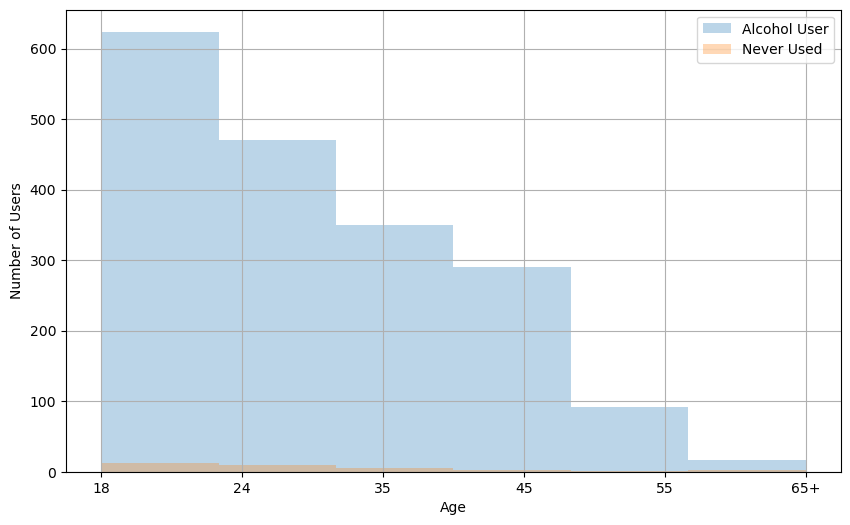

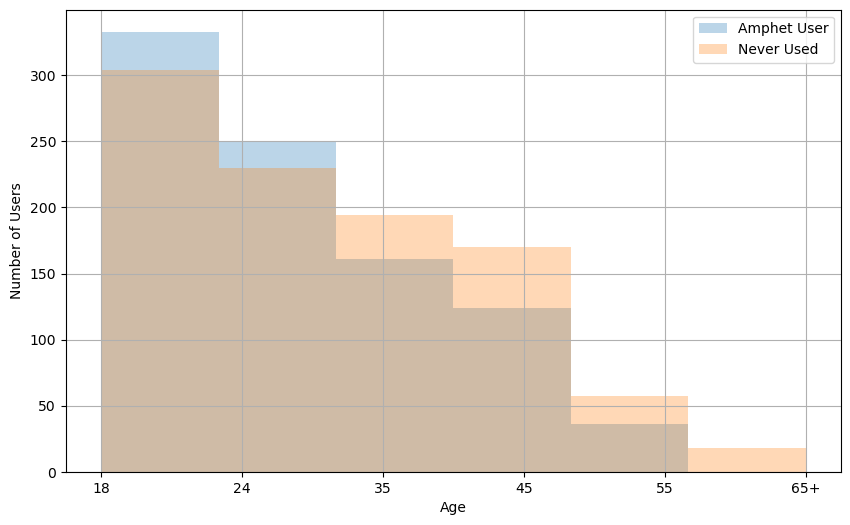

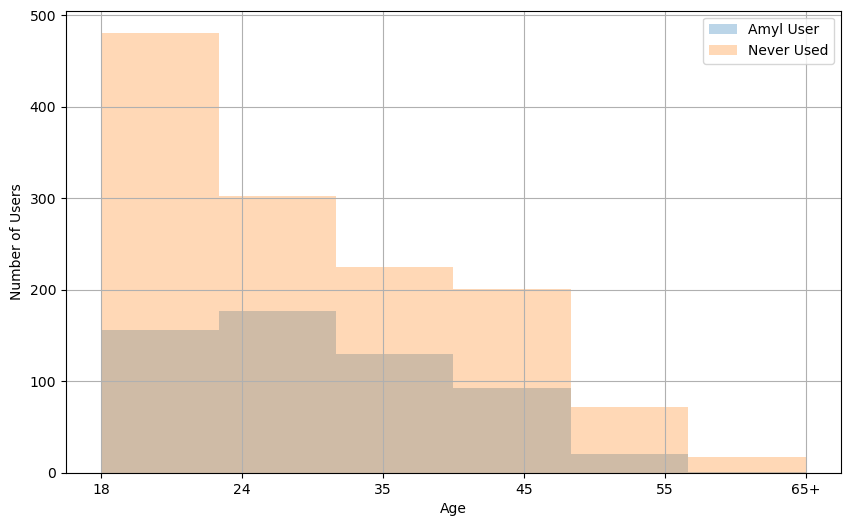

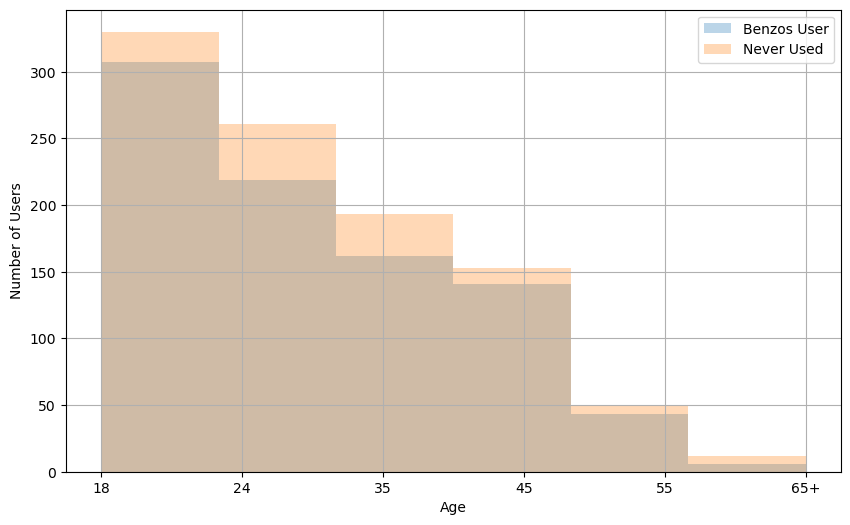

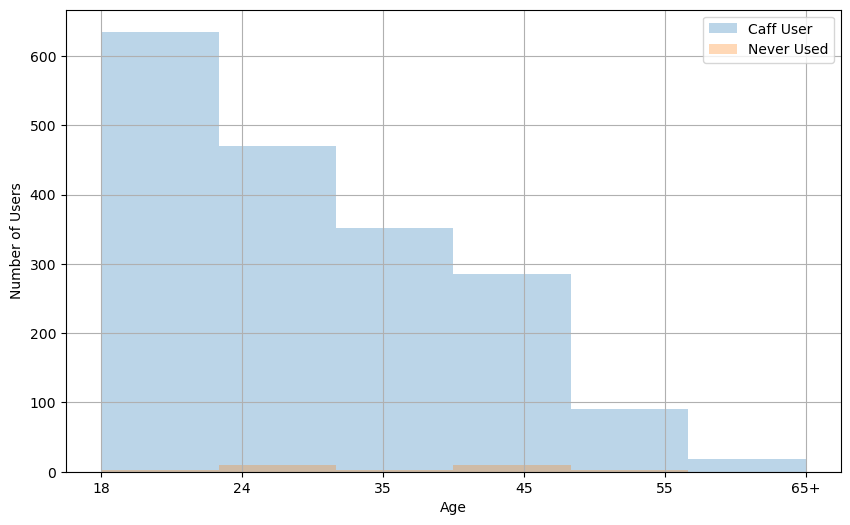

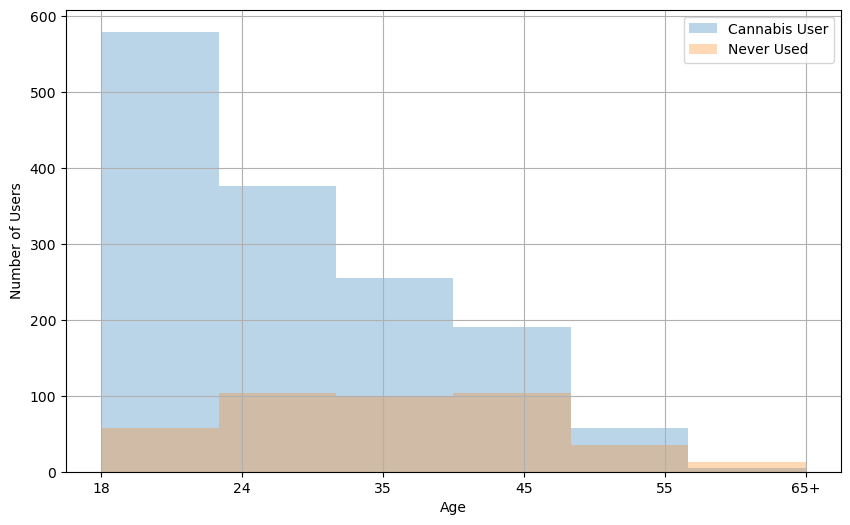

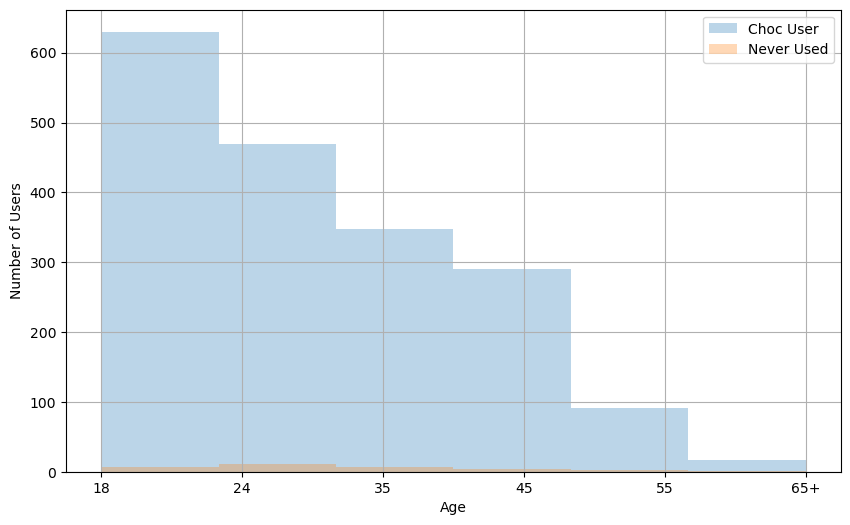

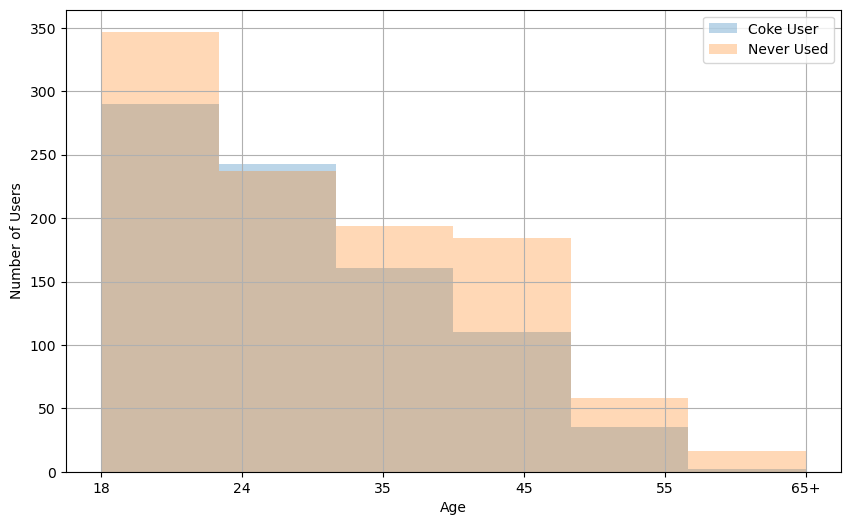

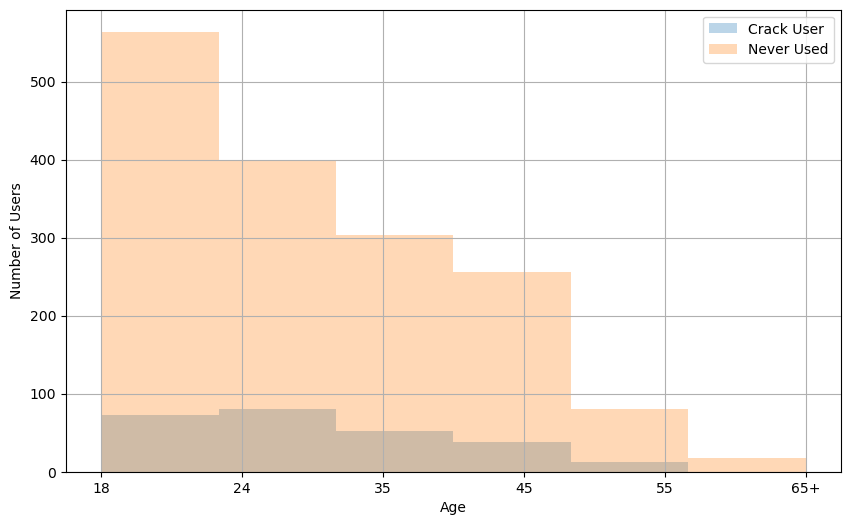

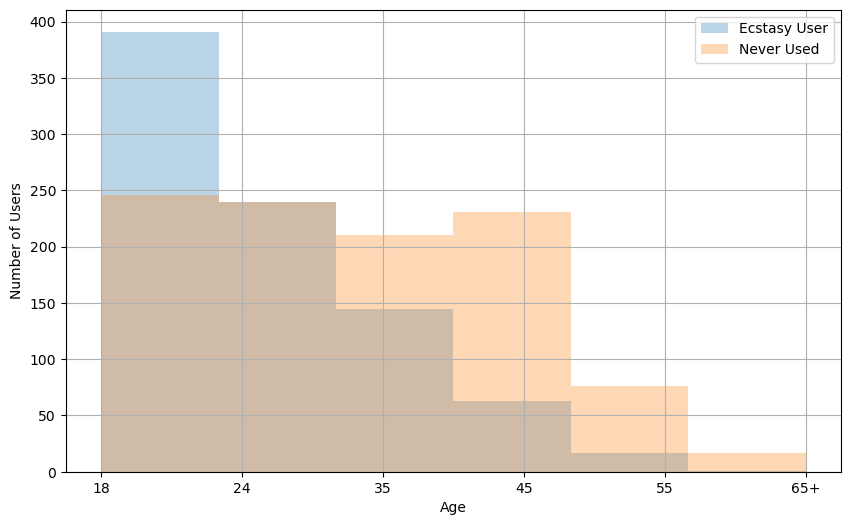

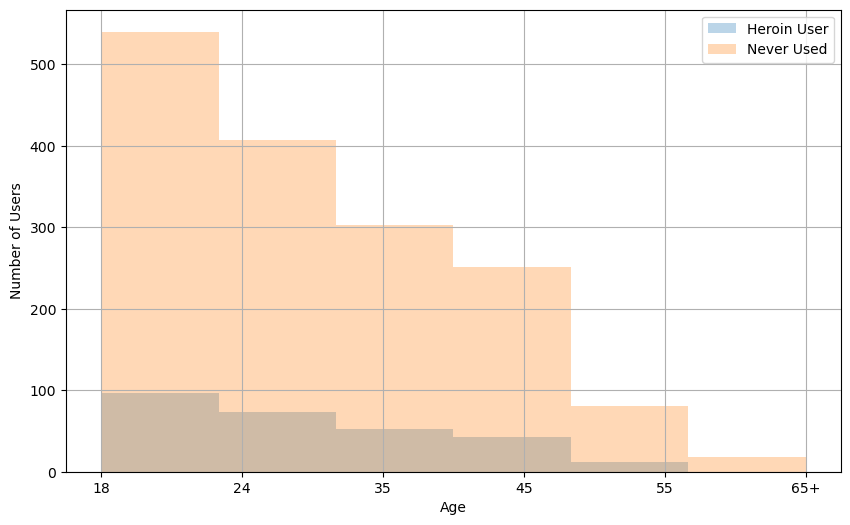

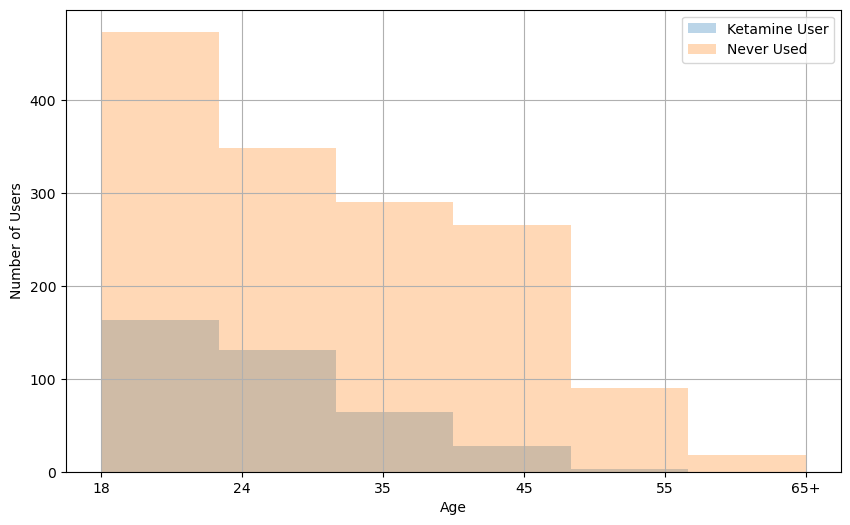

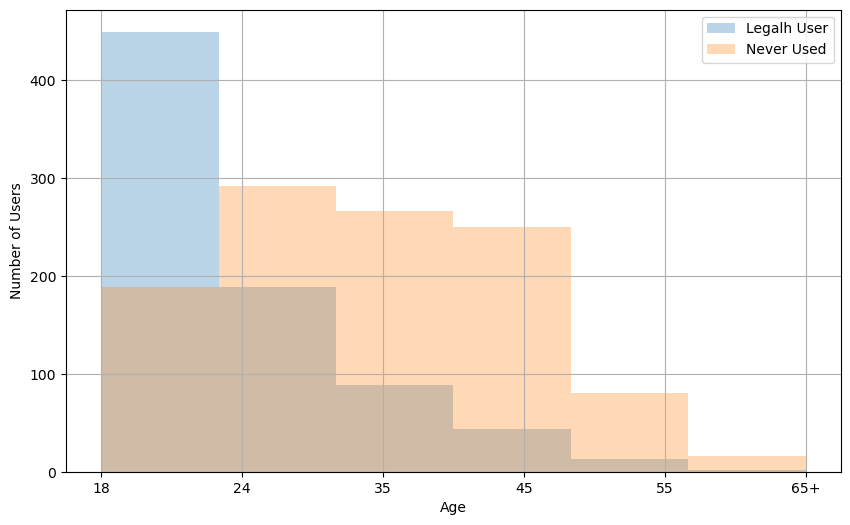

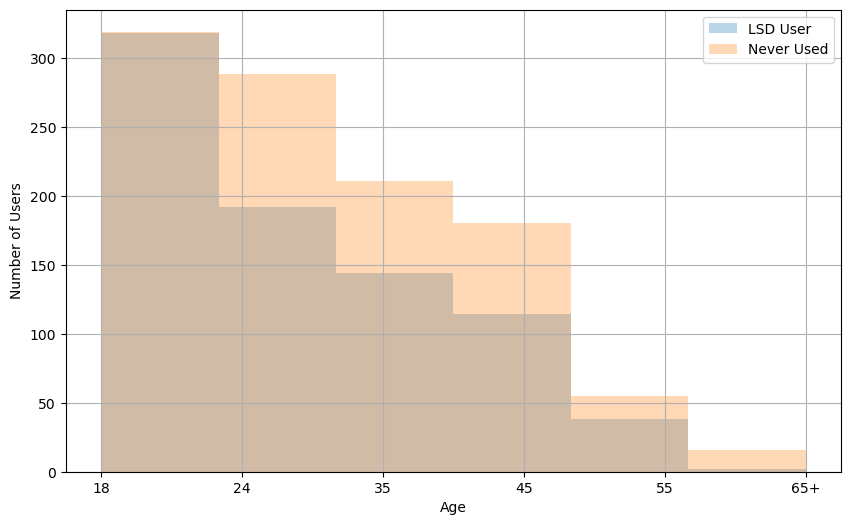

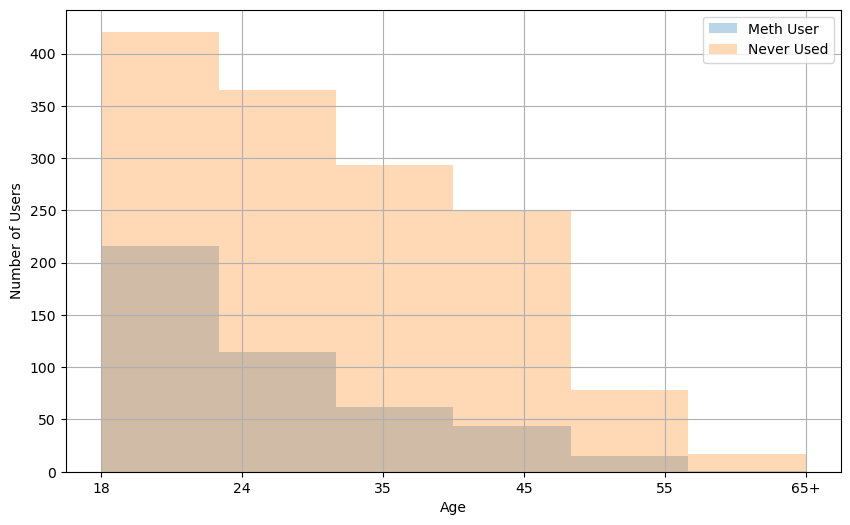

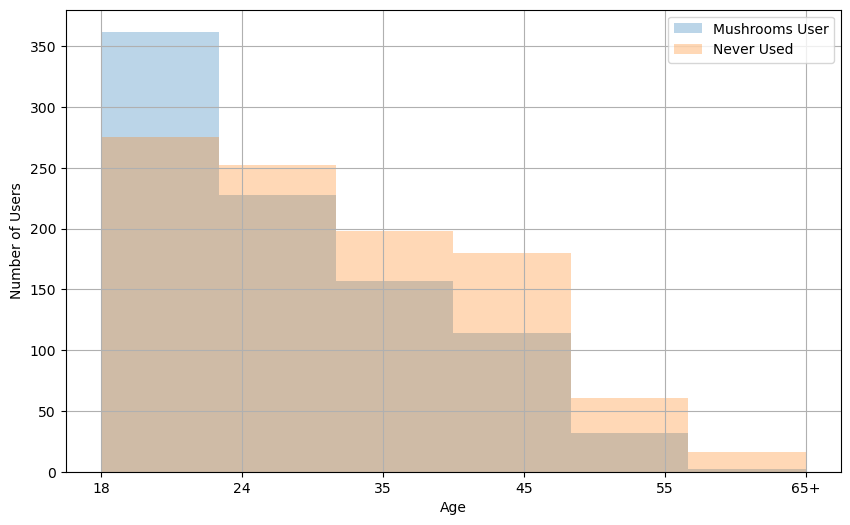

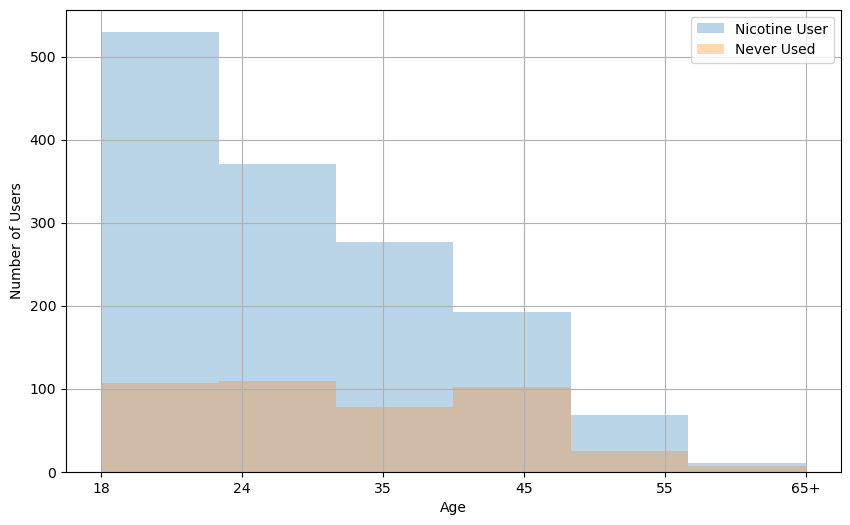

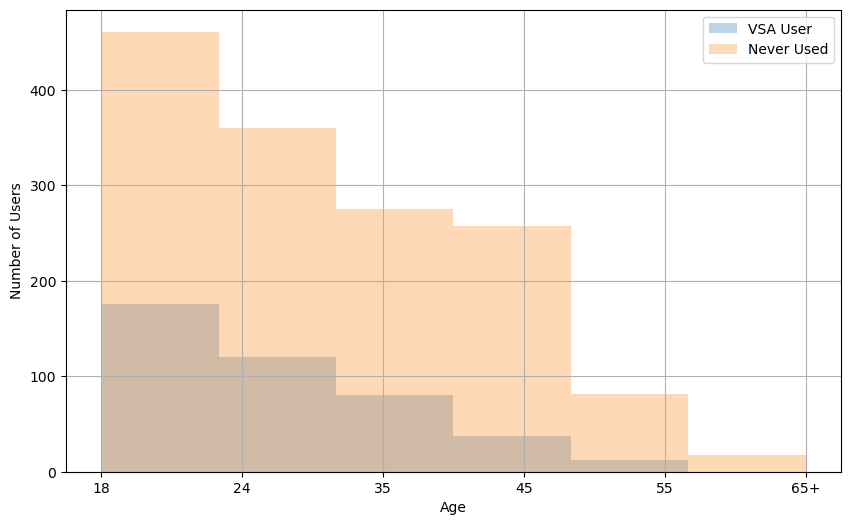

In [19]:
for i in range(12, len(df_encoded.columns)):
    age_vs_drug_vs_usage(df_encoded, i)

In [20]:
# 2) Consumo de drogas según el género.
def gender_vs_drug_usage(df_encoded, drug_number):
    temp = df_encoded.columns
    drug = temp[drug_number]
    df_encoded['Gender (Real)'] = df_encoded['Gender (Real)'].astype(str)
    
    plt.figure(figsize=(10, 6))
    GenderPlot = sns.countplot(x = drug, hue = 'Gender (Real)', data = df_encoded)

    labels = ['Never Used', drug + ' User']
    GenderPlot.set_xticklabels(labels)

    GenderPlot.set(ylabel = 'Number of Users', xlabel = drug +' Consumption')
    plt.legend(title = drug +' User', loc='upper left', labels = ['Female', 'Male'])
    
    plt.show()

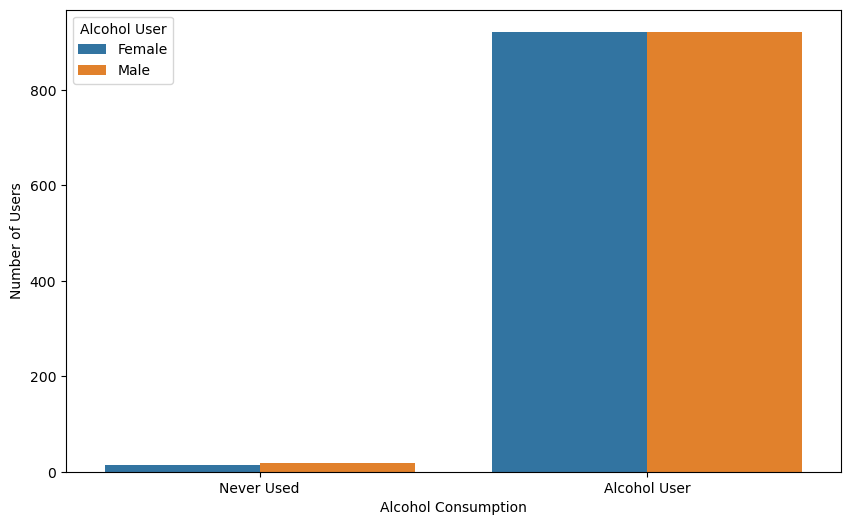

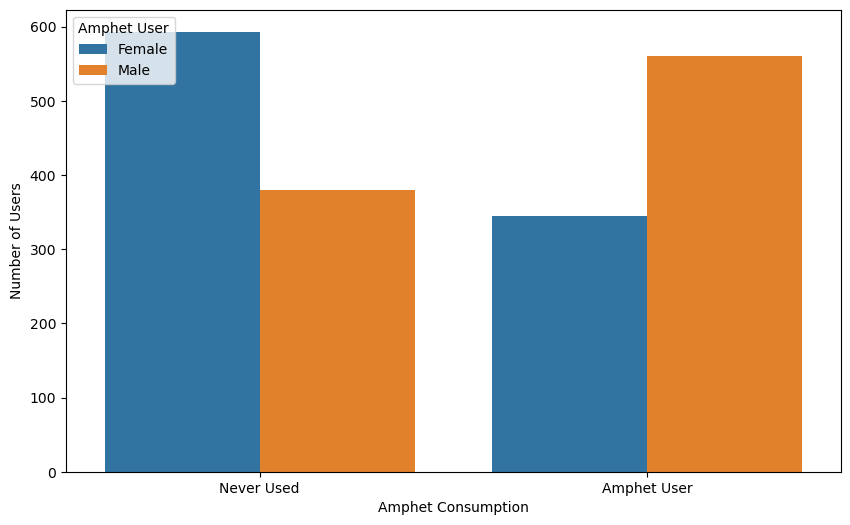

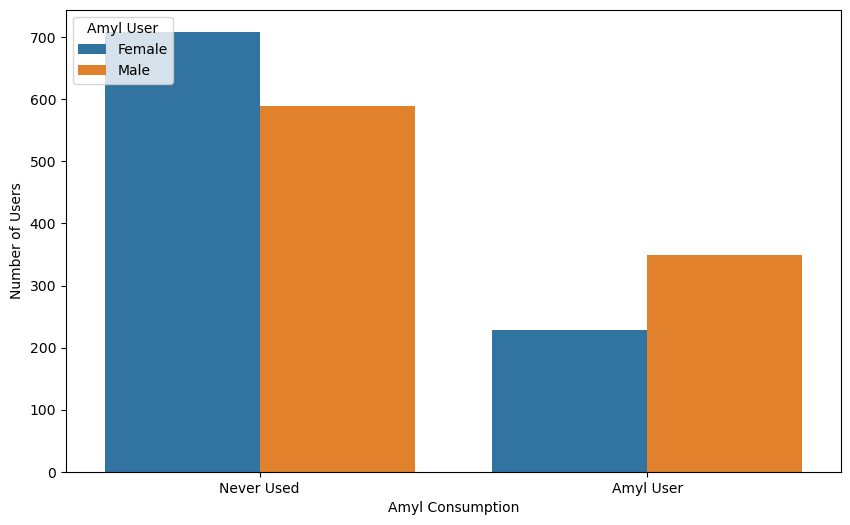

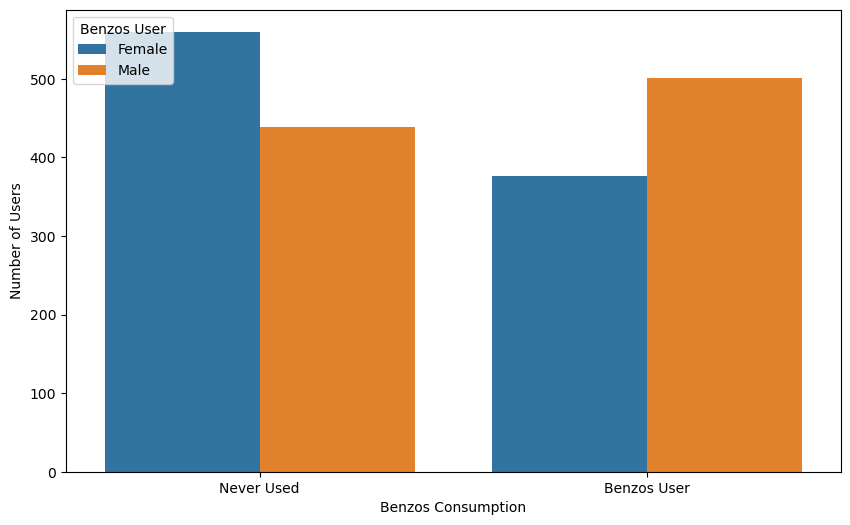

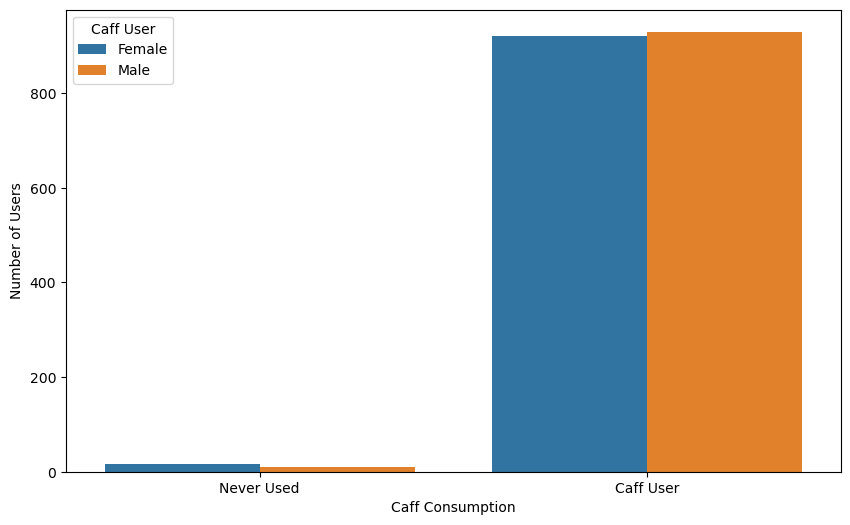

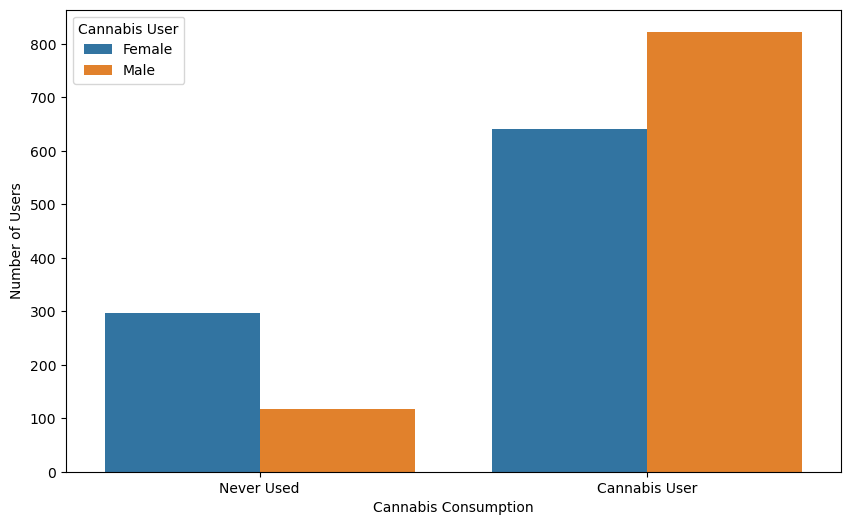

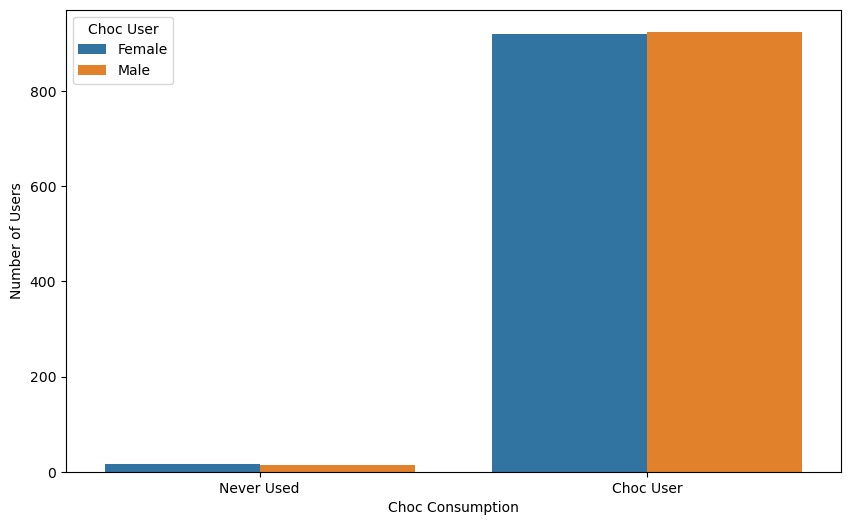

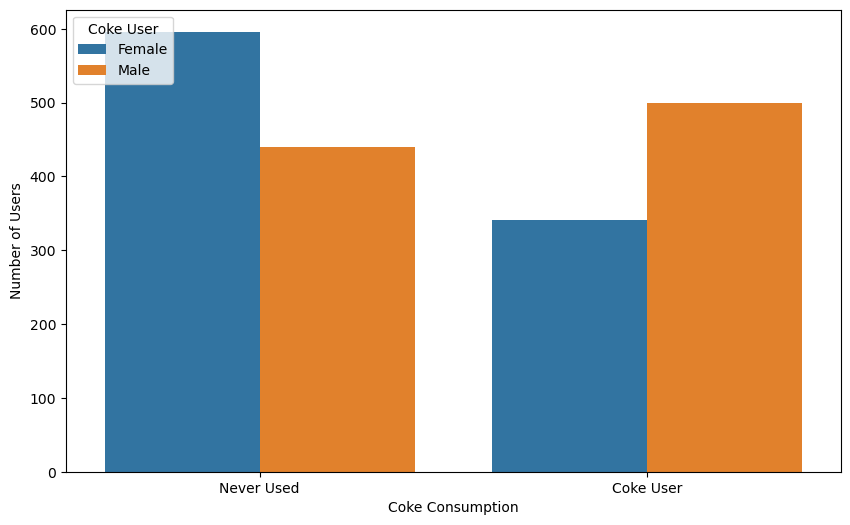

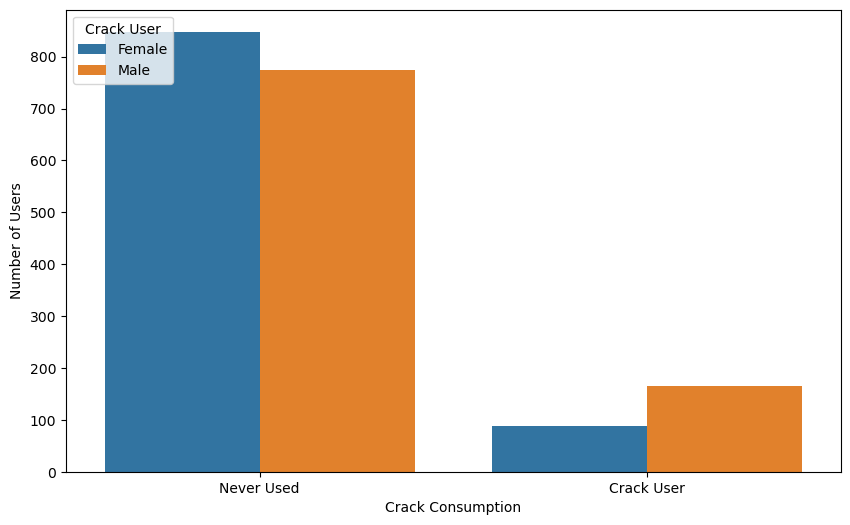

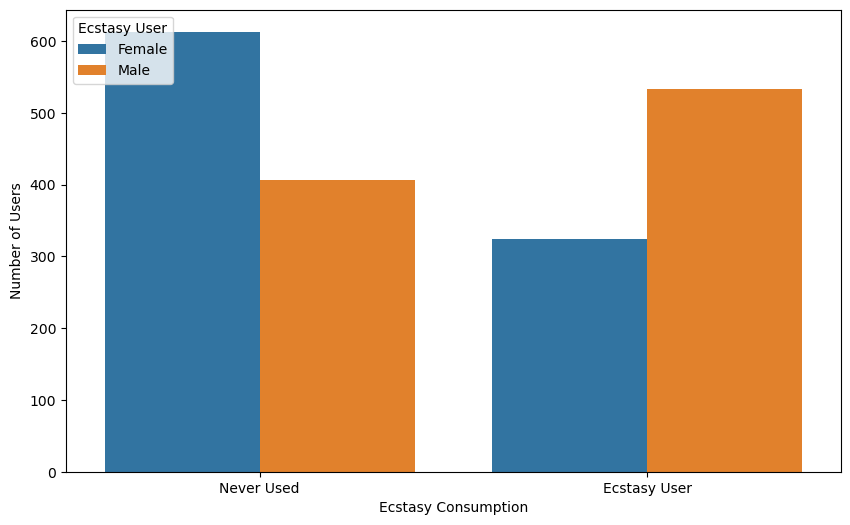

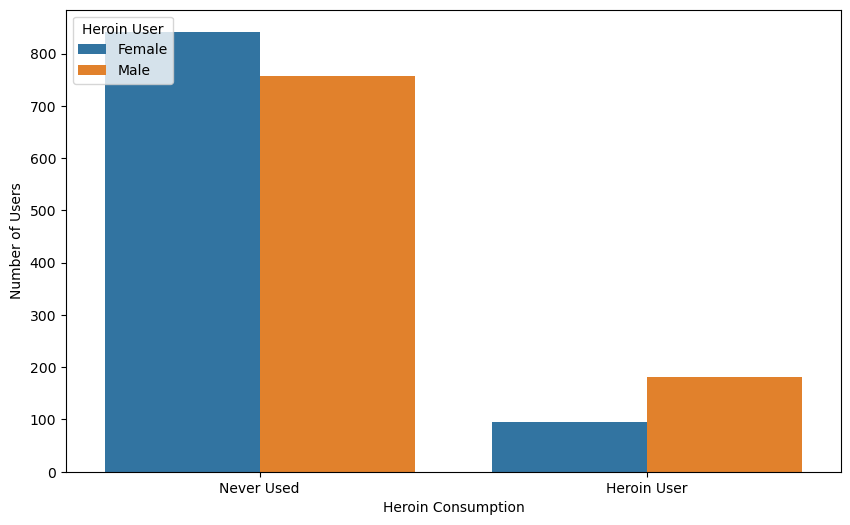

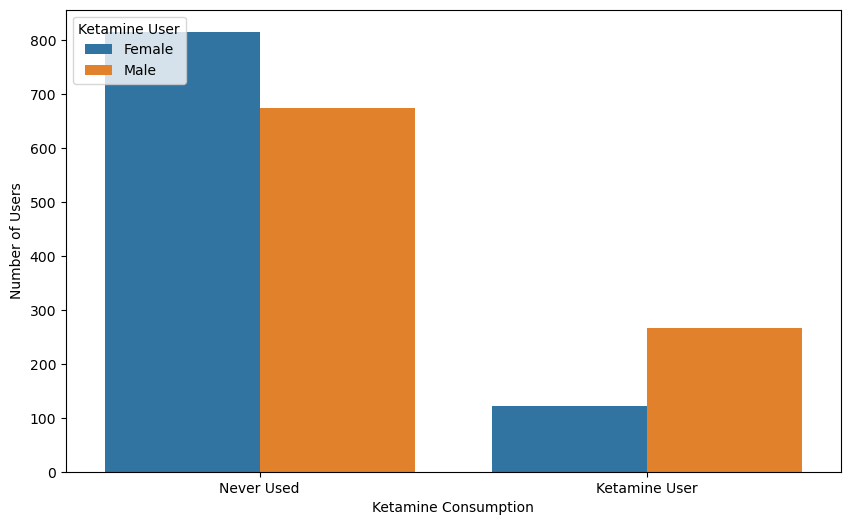

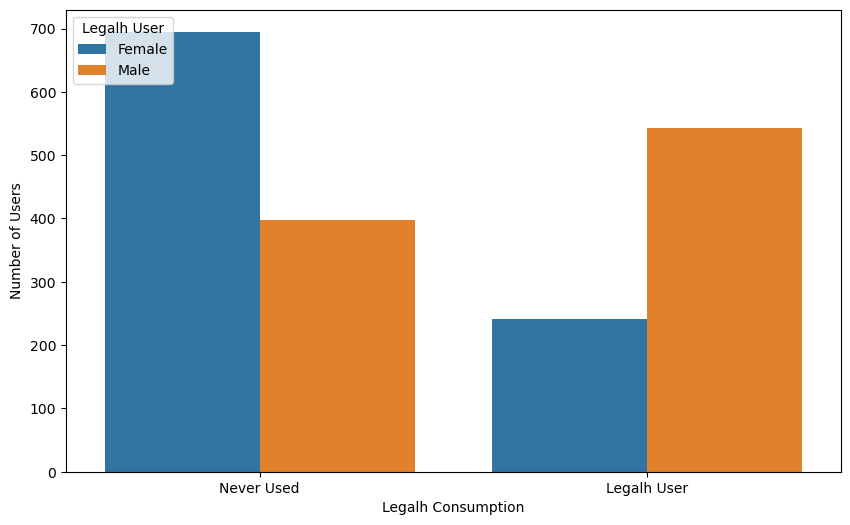

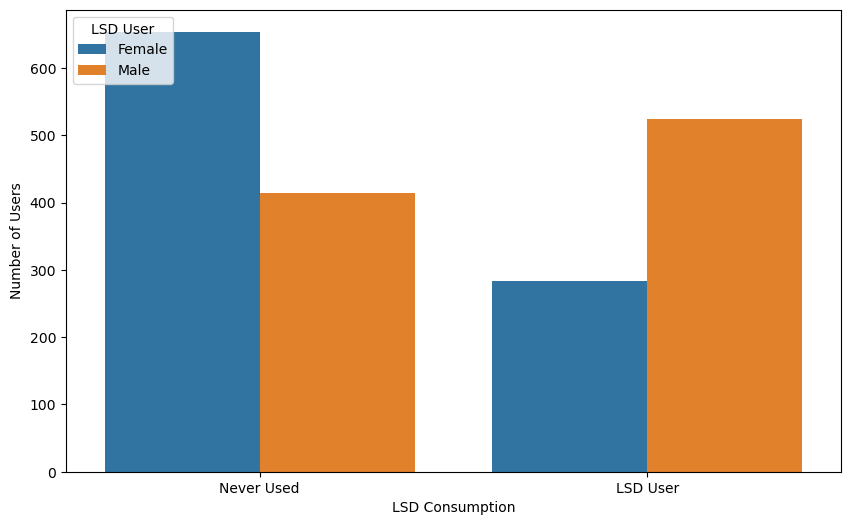

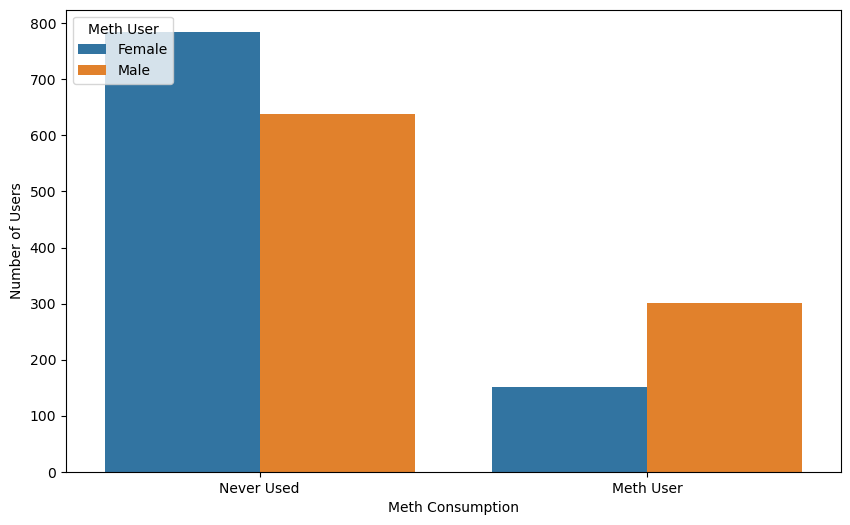

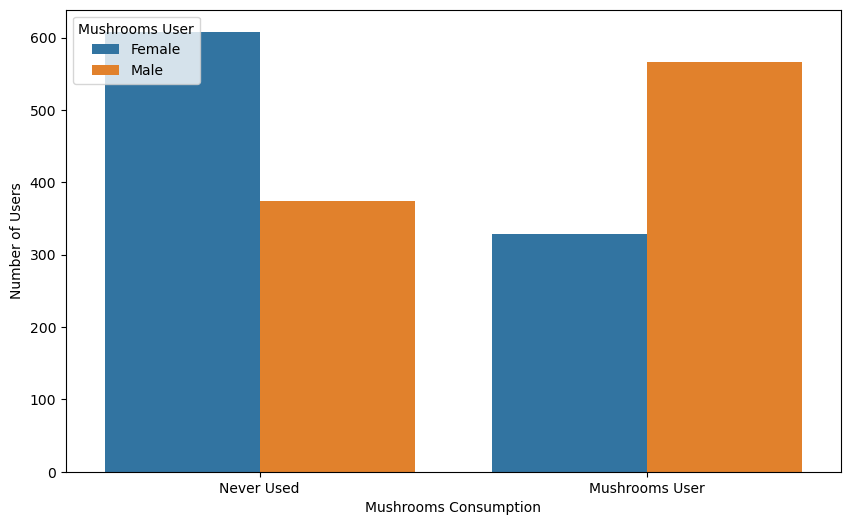

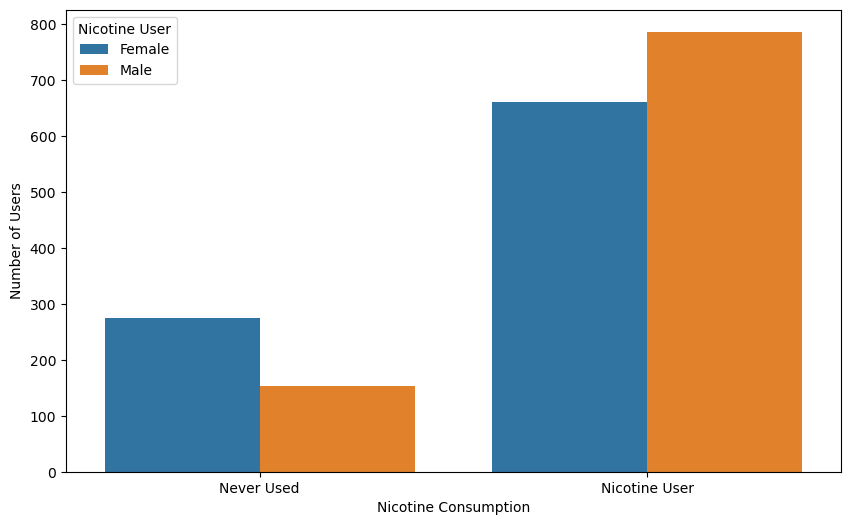

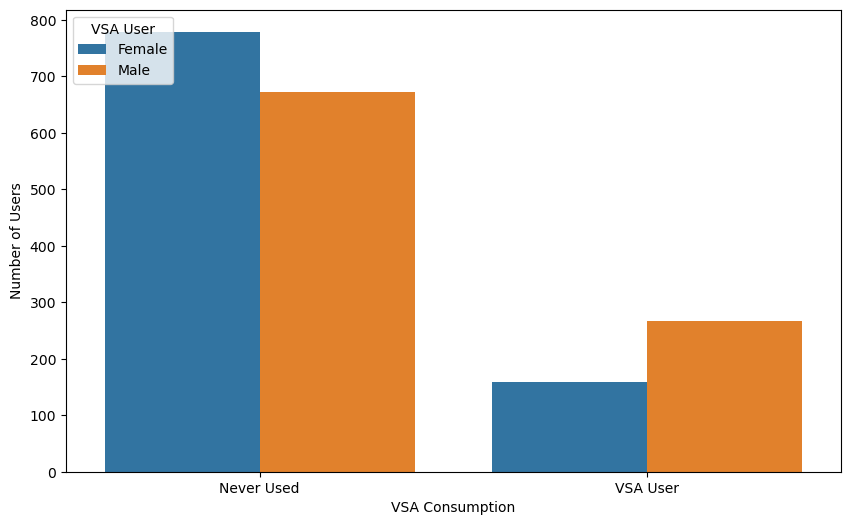

In [21]:
for i in range(12, len(df_encoded.columns)):
    gender_vs_drug_usage(df_encoded, i)

In [22]:
# 3) Consumo de drogas según el nivel de educación.
def education_vs_drug_usage(df_encoded, drug_number):
    temp = df_encoded.columns
    drug = temp[drug_number]
    df_encoded['Education (Real)'] = df_encoded['Education (Real)'].astype(str)
    
    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    EducationPlot = sns.countplot(x = drug, hue = 'Education (Real)', data = df_encoded)
    labels = ['Never Used', drug + ' User']
    EducationPlot.set_xticklabels(labels)
    EducationPlot.set(ylabel = 'Number of Users', xlabel= drug + ' Consumption')

    plt.legend(title = 'Education Level', loc = 'upper left', 
           labels=['Left School before 16', 'Left School at 16', 'Left School at 17', 'Left School at 18',
                   'Some College', 'Certificate/Diploma', 'University Degree', 'Masters', 'Doctorate'])
    
    plt.show()

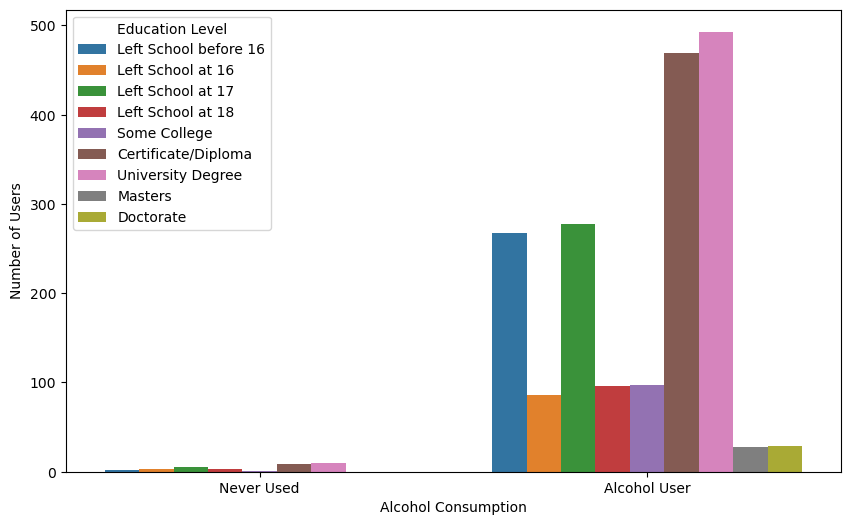

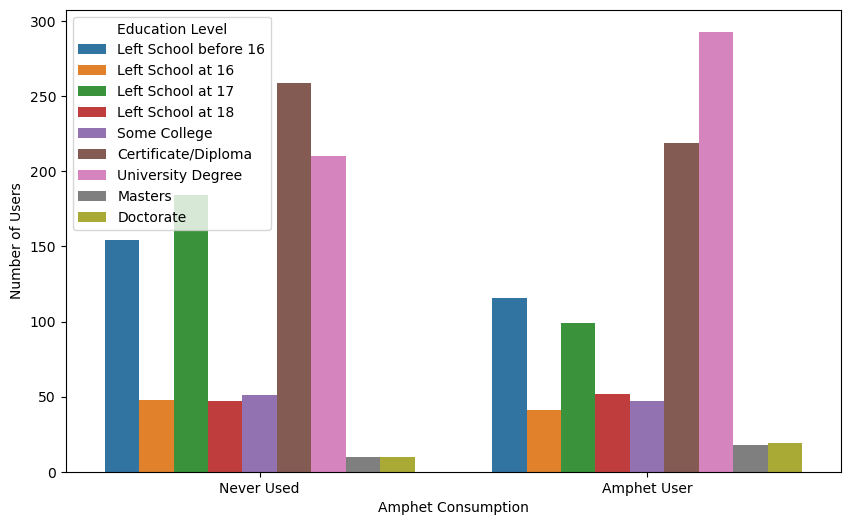

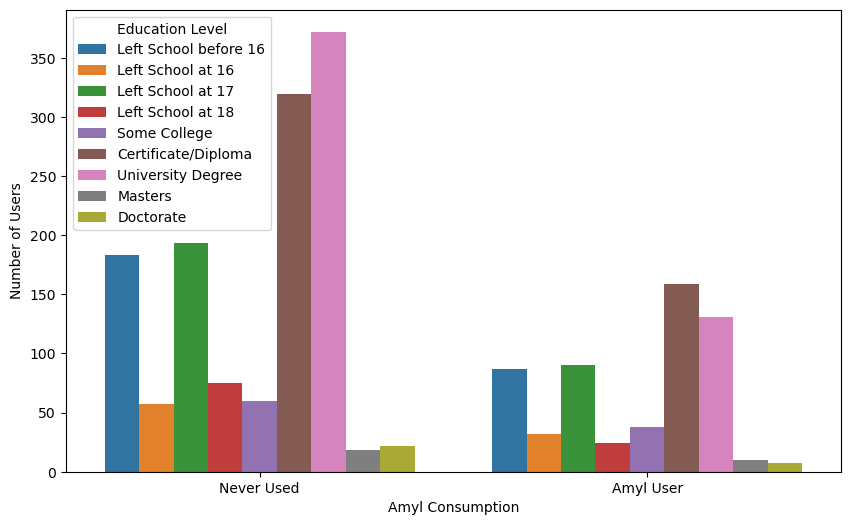

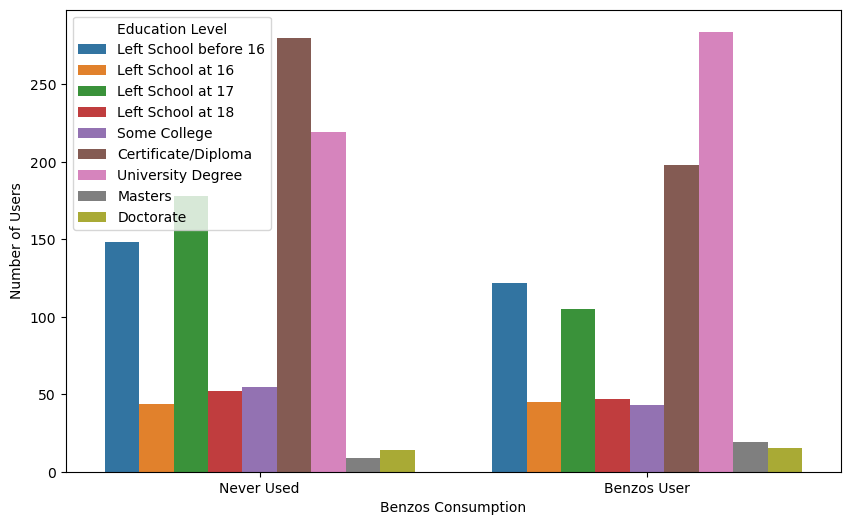

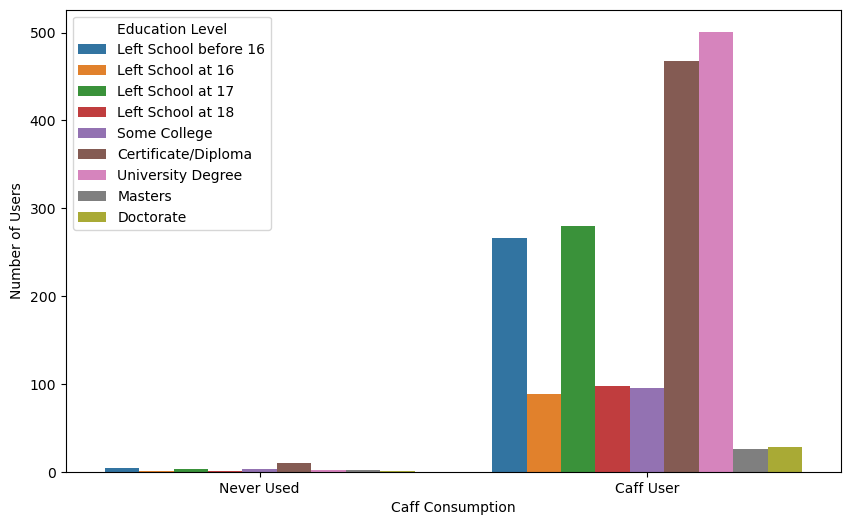

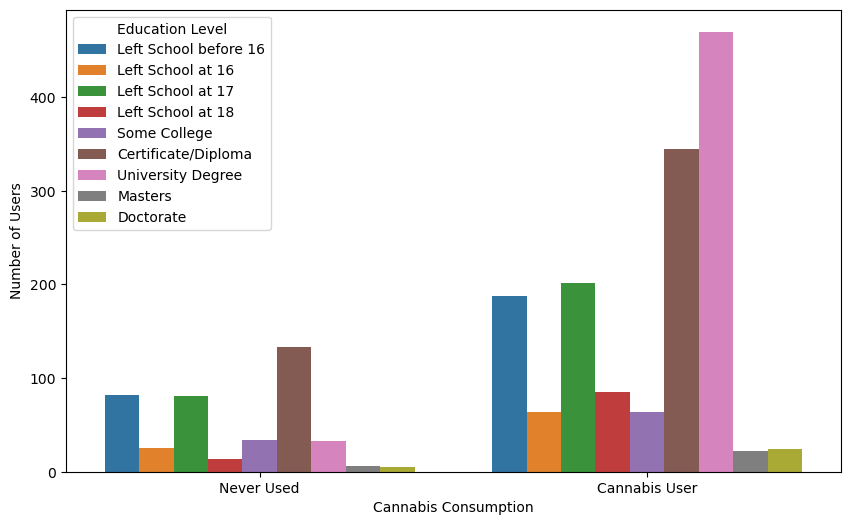

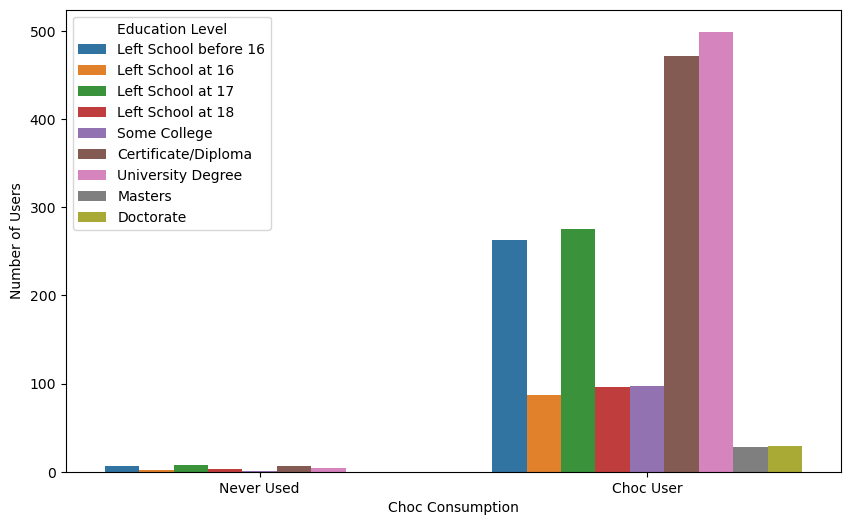

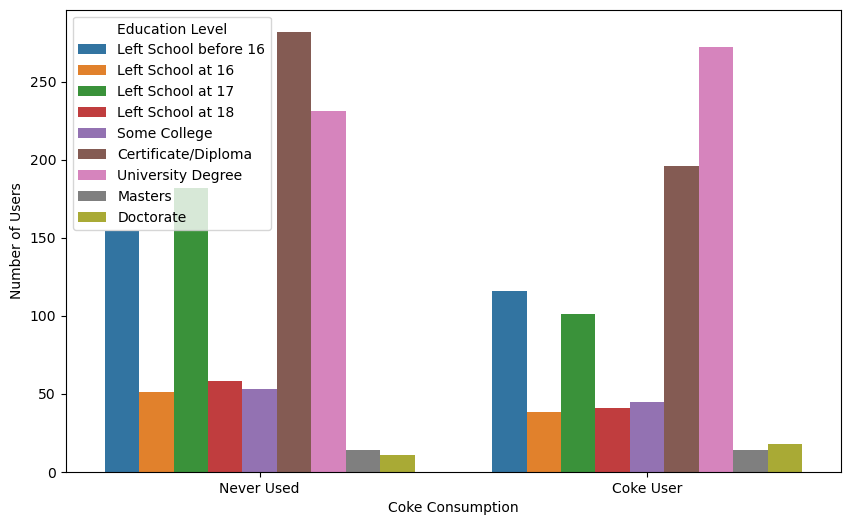

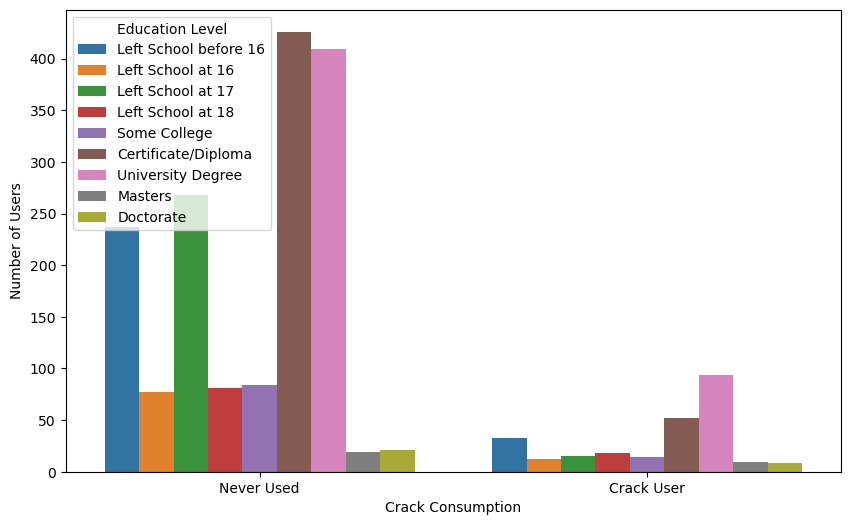

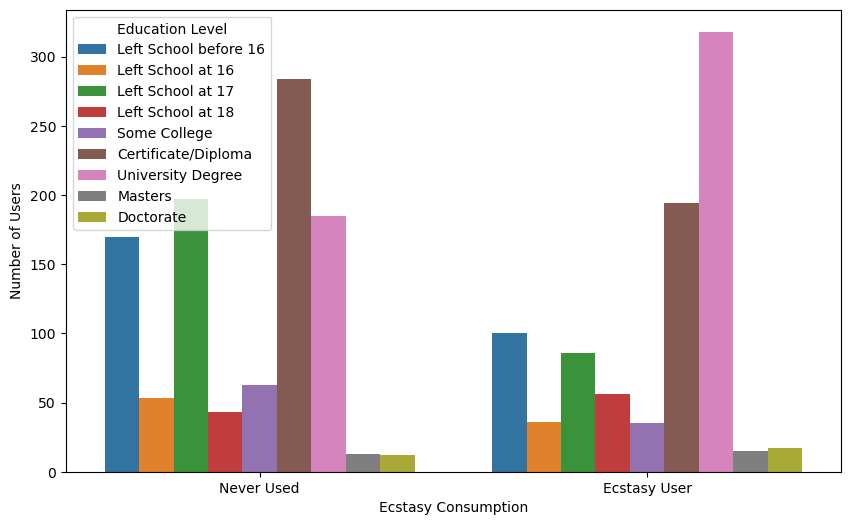

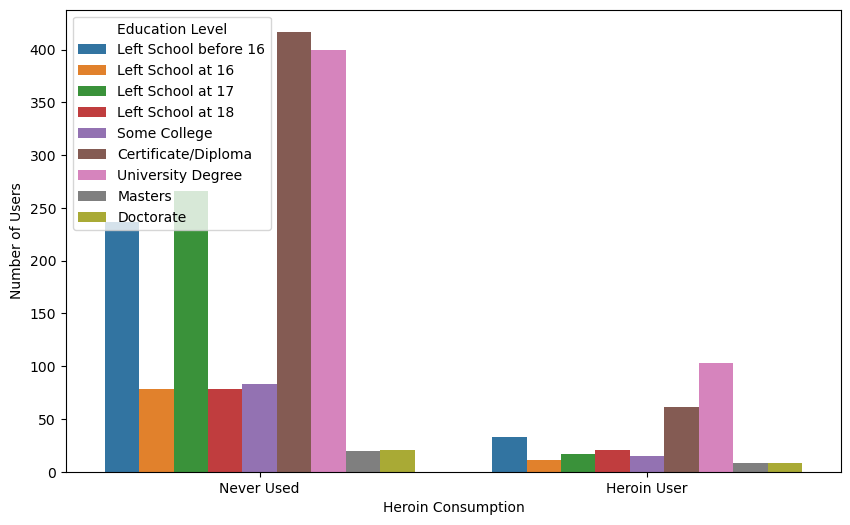

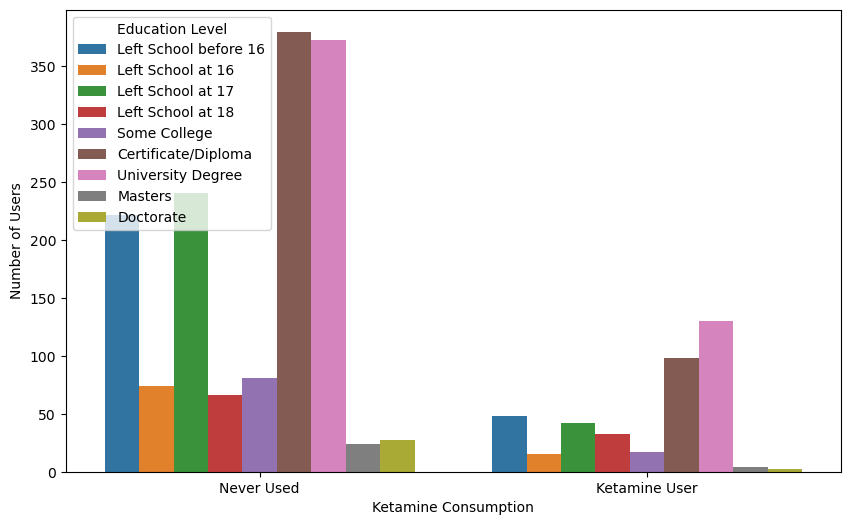

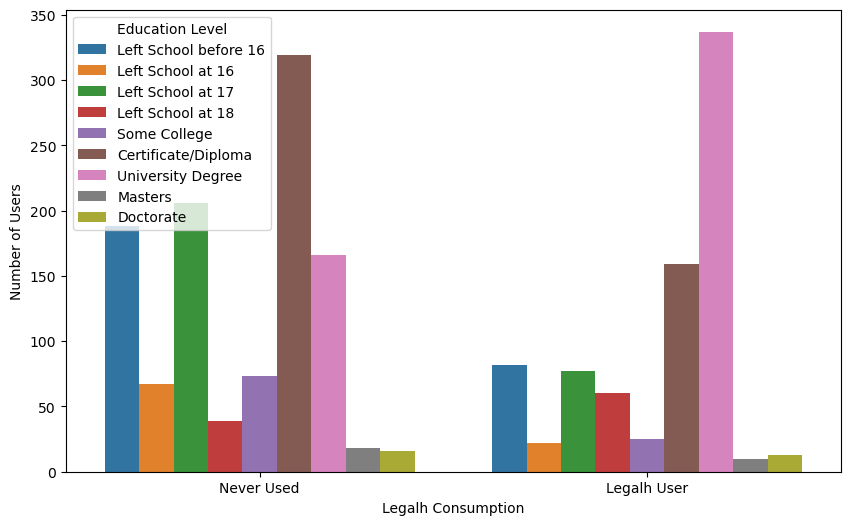

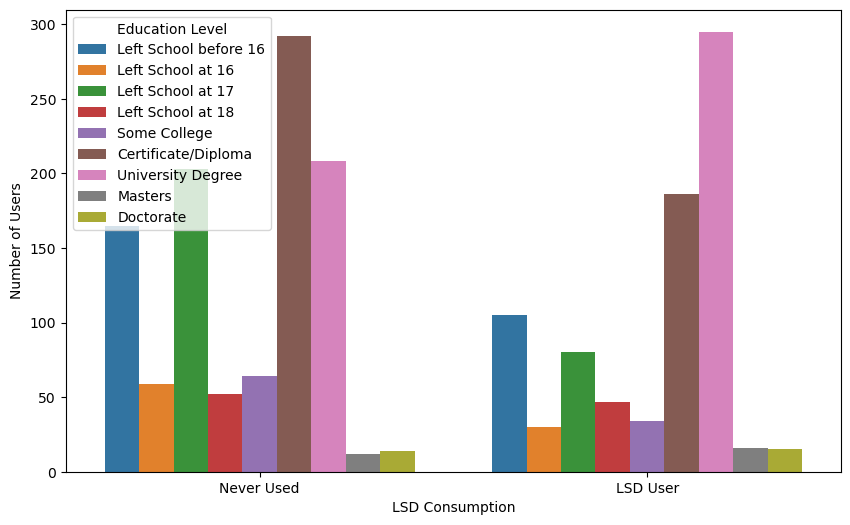

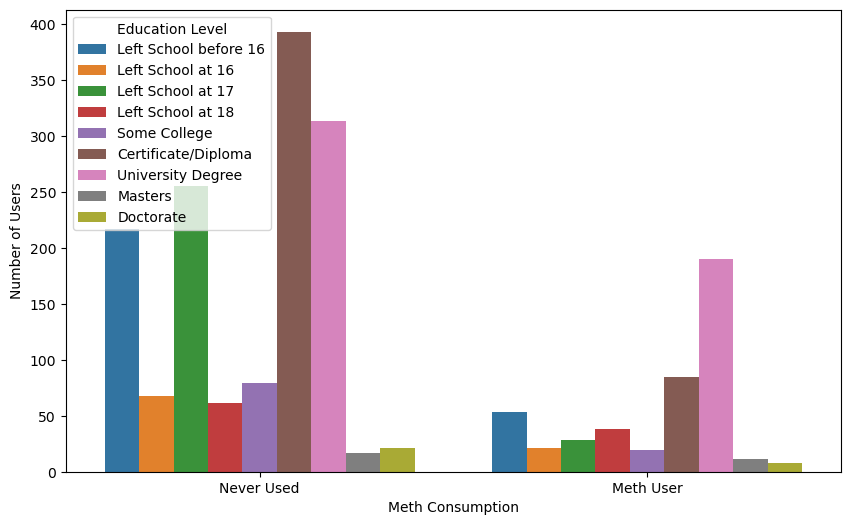

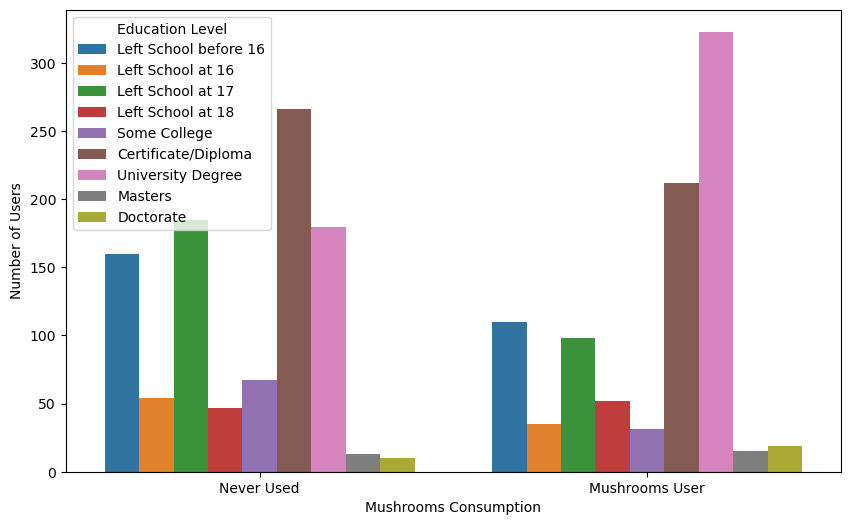

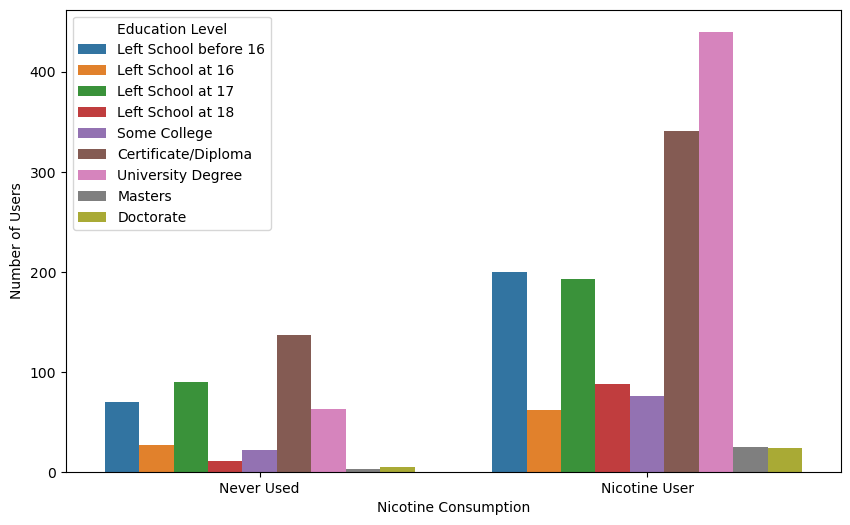

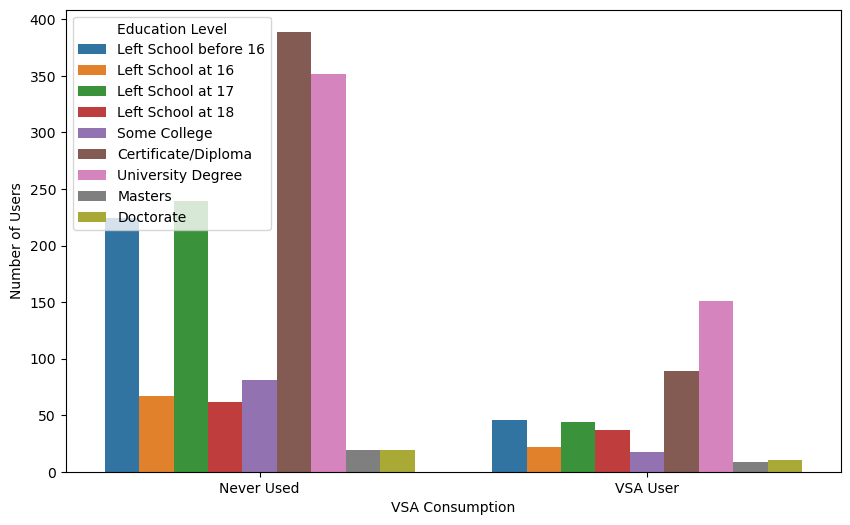

In [23]:
for i in range(12, len(df_encoded.columns)):
    education_vs_drug_usage(df_encoded, i)


#### Objetivos: 


1. ¿Cuáles son las caracteristicas comunes entre los grupos de consumidores y no consumidores? ¿Qué factores influyen en el consumo de sustancias?  

2. ¿Qué tipos de sustancias son más consumidas por las personas con diferentes características?

3. ¿Cuales son las drogas mayormente consumidas?

4. ¿Cuáles son los fármacos con alta correlación? ¿Estas correlaciones permiten establecer patrones de consumo? 

5. ¿Cuáles son las sustancias con baja correlación? 

6. ¿Cómo se relacionan el consumo de sustancias y la personalidad? 

#### 6.1. ¿Cuáles son las caracteristicas comunes entre los grupos de consumidores y no consumidores? ¿Qué factores influyen en el consumo de sustancias?

El dataset incluye información sobre factores demográficos, psicológicos y conductuales que podrían estar relacionados con el consumo de sustancias. Por ejemplo, se podría analizar si hay diferencias en el consumo de sustancias según la edad, el género, el nivel de educación o la etnicidad.

#### 6.2. ¿Qué tipos de sustancias son más consumidas por las personas con diferentes características?

 El dataset incluye información sobre el consumo de una amplia gama de sustancias, desde alcohol y tabaco hasta drogas ilegales. Se podría analizar si hay diferencias en el consumo de estas sustancias según las características de las personas.


#### 6.3. Cuales son las drogas mayormente consumidas? 
 Hacer agrupaciones por las variables independientes. 

#### 6.4. Cuáles son los fármacos con alta correlación? ¿Estas correlaciones permiten establecer patrones de consumo? 


#### 6.5. Cuáles son las sustancias con baja correlación?

#### 6.6. ¿Cómo se relacionan el consumo de sustancias y la personalidad? <br>

El dataset incluye información sobre la personalidad de las personas, evaluada mediante cuestionarios psicológicos. Se podría analizar si hay relaciones entre el consumo de sustancias y las diferentes dimensiones de la personalidad.